# <center><font color = "green">PUBG Game Prediction</font></center>

<center><img src = "https://media.giphy.com/media/XVbrX433vn6rqkexSj/giphy.gif"></center>

### Table Content 

1. [Importing Libraries](#import)
2. [Reading Data](#read)
3. [Data Wrangling](#wrangle)
4. [Feature Engineering](#feature)
5. [ML - CatBoost Model](#cat)

# <font color = "green">Importing Libraries</font><a class = "anchor" id = "import"></a>

In [1]:

# handling warnings
import warnings
warnings.filterwarnings("ignore")

# standard libraries
import numpy as np
import pandas as pd


# visualisation
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 6)

import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# <font color = "green">Reading the Data </font><a class = "anchor" id = "read"></a>

In [2]:
# load the data
df = pd.read_csv("PUBG_Game_Prediction.csv")

In [3]:
# glimpse of the data
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
# data dimension
df.shape

(102004, 29)

In [13]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102004 entries, 0 to 102003
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Id               102004 non-null  object 
 1   groupId          102004 non-null  object 
 2   matchId          102004 non-null  object 
 3   assists          102004 non-null  int64  
 4   boosts           102004 non-null  int64  
 5   damageDealt      102004 non-null  float64
 6   DBNOs            102004 non-null  int64  
 7   headshotKills    102004 non-null  int64  
 8   heals            102004 non-null  int64  
 9   killPlace        102004 non-null  int64  
 10  killPoints       102004 non-null  int64  
 11  kills            102004 non-null  int64  
 12  killStreaks      102004 non-null  int64  
 13  longestKill      102004 non-null  float64
 14  matchDuration    102004 non-null  int64  
 15  matchType        102004 non-null  object 
 16  maxPlace         102004 non-null  int6

### Data Descritption

- <b>DBNOs -</b> Number of enemy players knocked.
- **assists -** Number of enemy players this player damaged that were killed by teammates.
- **boosts -** Number of boost items used.
- **damageDealt -** Total damage dealt. Note: Self inflicted damage is subtracted.
- **headshotKills -** Number of enemy players killed with headshots.
- **heals -** Number of healing items used.
- **Id -** Player’s Id
- **killPlace -** Ranking in match of number of enemy players killed.
- **killPoints -** Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
- **killStreaks -** Max number of enemy players killed in a short amount of time.
- **kills -** Number of enemy players killed.
- **longestKill -** Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
- **matchDuration -** Duration of match in seconds.
- **matchId -** ID to identify match. There are no matches that are in both the training and testing set.
- **matchType -** String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
- **rankPoints -** Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
- **revives -** Number of times this player revived teammates.
- **rideDistance -** Total distance traveled in vehicles measured in meters.
- **roadKills -** Number of kills while in a vehicle.
- **swimDistance -** Total distance traveled by swimming measured in meters.
- **teamKills -** Number of times this player killed a teammate.
- **vehicleDestroys -** Number of vehicles destroyed.
- **walkDistance -** Total distance traveled on foot measured in meters.- 
- **weaponsAcquired -** Number of weapons picked up.
- **winPoints -** Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
- **groupId -** ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- **numGroups -** Number of groups we have data for in the match.
- **maxPlace -** Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- **winPlacePerc -** The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

# <font color = "green">Data Wrangling</font><a class = "anchor" id = "wrangle"></a>

#### Check for the rows with missing win prediction value 

In [15]:
# check row with NULL win prediction value
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


#### Understanding Players distribution in a game

In [18]:
# prepare new parameter to know how many players are in a game
df['playersJoined'] = df.groupby('matchId')['matchId'].transform('count')

In [20]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,4
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,5
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,3
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,6
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,4


In [25]:
df['playersJoined'].value_counts()

playersJoined
3     27471
2     25540
4     20012
1     12015
5     10280
6      4542
7      1589
8       360
9       135
10       60
Name: count, dtype: int64

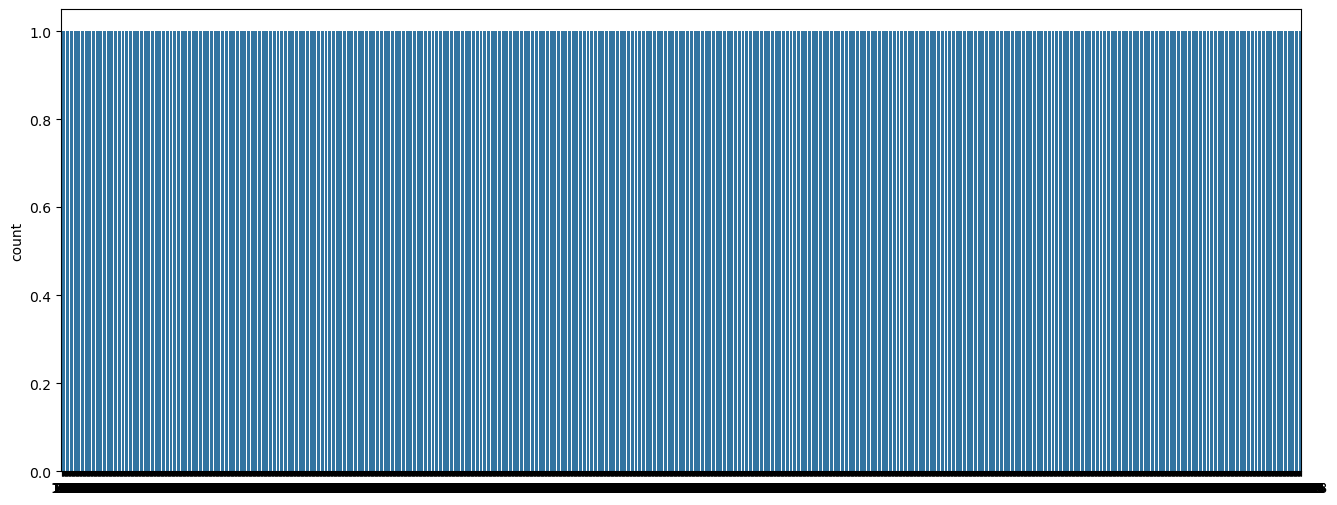

In [28]:
sns.countplot(df[df['playersJoined']>=7]['playersJoined'])
plt.show()

## Analysing the data

##### Kills Without Moving?

<center><img src = "https://media.giphy.com/media/OPRbXcsGctvZC/giphy.gif"></center>

In [29]:
# prepare a data parameter to gather the information of the total distance travelled
df['totalDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']

# prepare a data parameter to check for anamoly detection that
# the person has not moved but still managed to do the kills
df['killswithoutMoving'] = ((df['kills']>0) & (df['totalDistance'] ==0))

In [30]:
df[df['killswithoutMoving'] == True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,killswithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,4,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,3,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,1,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,1,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,3,0.0,True


In [31]:
df[df['killswithoutMoving'] == True].shape

(42, 32)

In [32]:
# drop the table
df.drop(df[df['killswithoutMoving'] == True].index , inplace = True)

#### Extra-ordinary Road Kills?????

<center><img src = "https://media.giphy.com/media/3o7aD85usFbbbrCR3i/giphy.gif"></center>

In [34]:
df[df['roadKills'] > 5].shape

(2, 32)

In [35]:
df.drop(df[df['roadKills'] > 5].index, inplace = True)

#### So many KILLS - how ????

<center><img src = "https://media.giphy.com/media/3oxHQfzBhpKtgdDWtW/giphy.gif"></center>

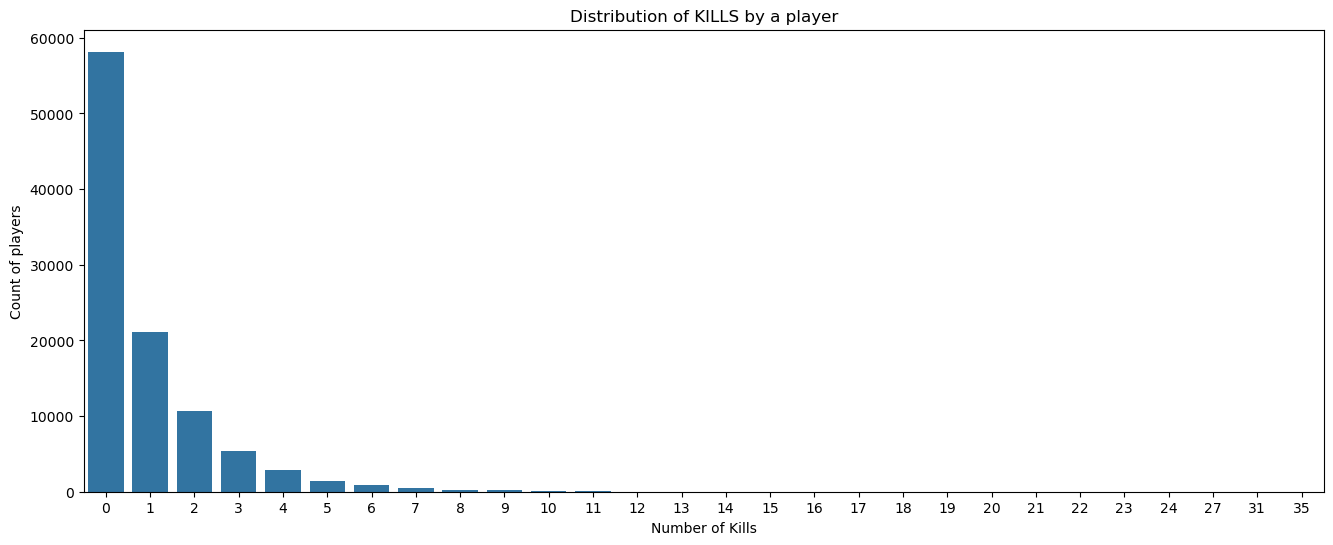

In [37]:
sns.countplot(data = df, x = df['kills']).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()

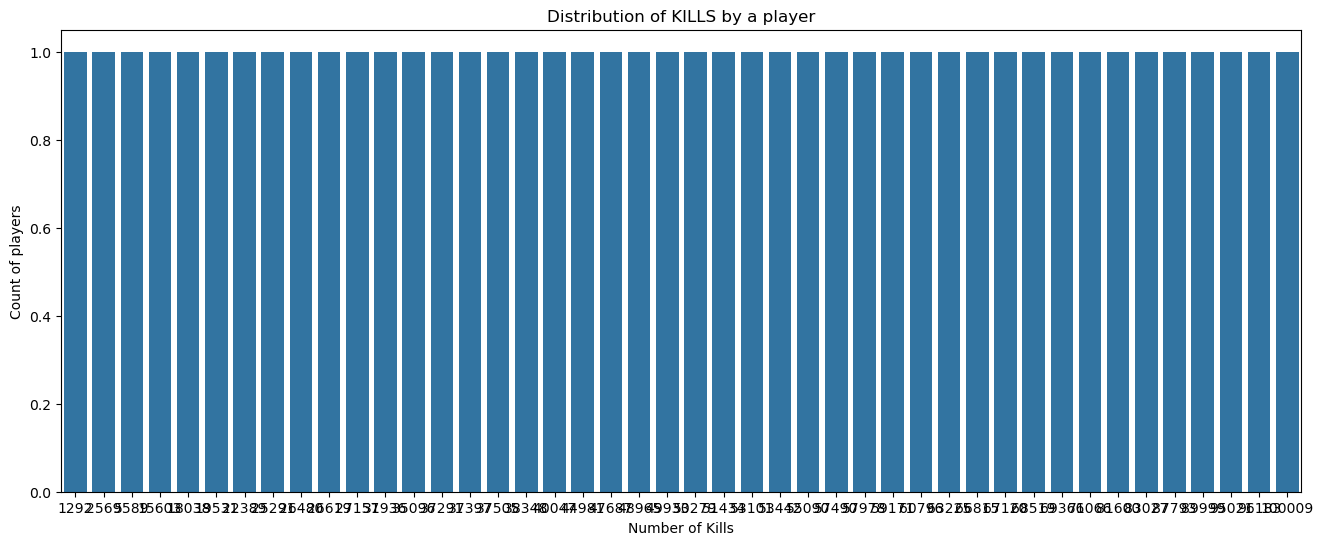

In [38]:
sns.countplot(df[df['kills']>=15]['kills']).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()

In [39]:
# data dimension
df[df['kills'] > 20].shape

(9, 32)

In [40]:
# drop the instances
df.drop(df[df['kills'] > 20].index, inplace = True)

#### Head Shot

<center><img src = "https://media.giphy.com/media/l3mZrOajz5VCZf7Hy/giphy.gif"></center>

In [42]:
df['headshot_rate'] = df['headshotKills']/df['kills']
df['headshot_rate'] = df['headshot_rate'].fillna(0)

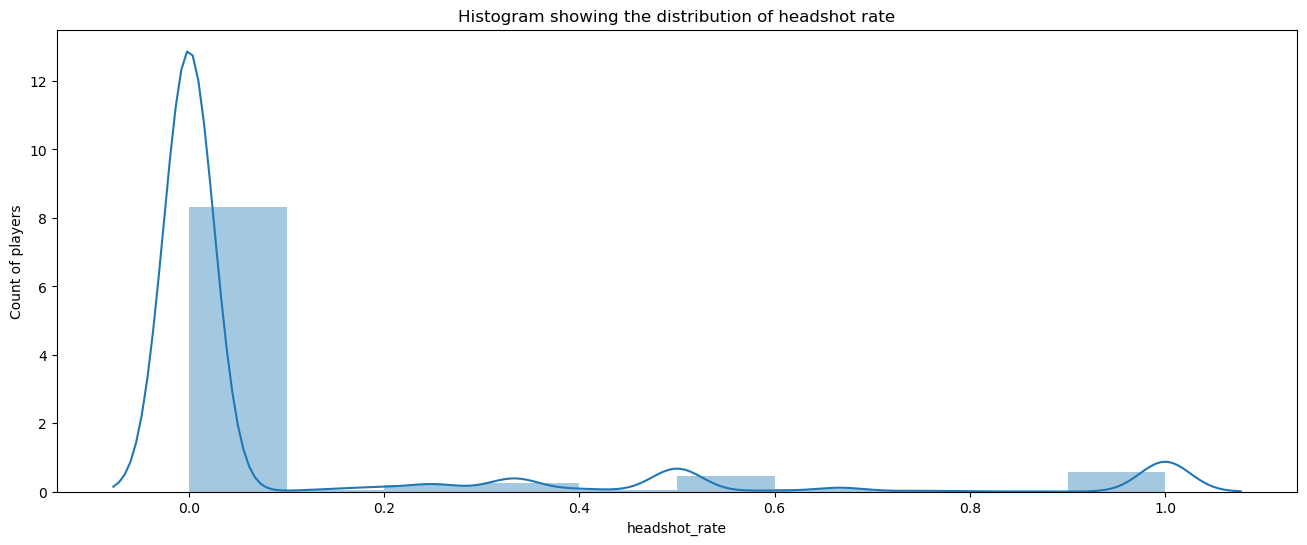

In [43]:
# plot the headshot rate distribution
sns.distplot(df['headshot_rate'], bins =10).set_title("Histogram showing the distribution of headshot rate")
plt.ylabel("Count of players")
plt.show()


In [44]:
df[(df['headshot_rate'] ==1) & (df['kills']>5)].shape

(3, 33)

In [48]:
df.drop(df[(df['headshot_rate'] == 1)& (df['kills'] > 6)].index, inplace = True)

#### Longest Shot

<center><img src = "https://media.giphy.com/media/3ohs7YomxqOz4GRHcQ/giphy.gif"></center>

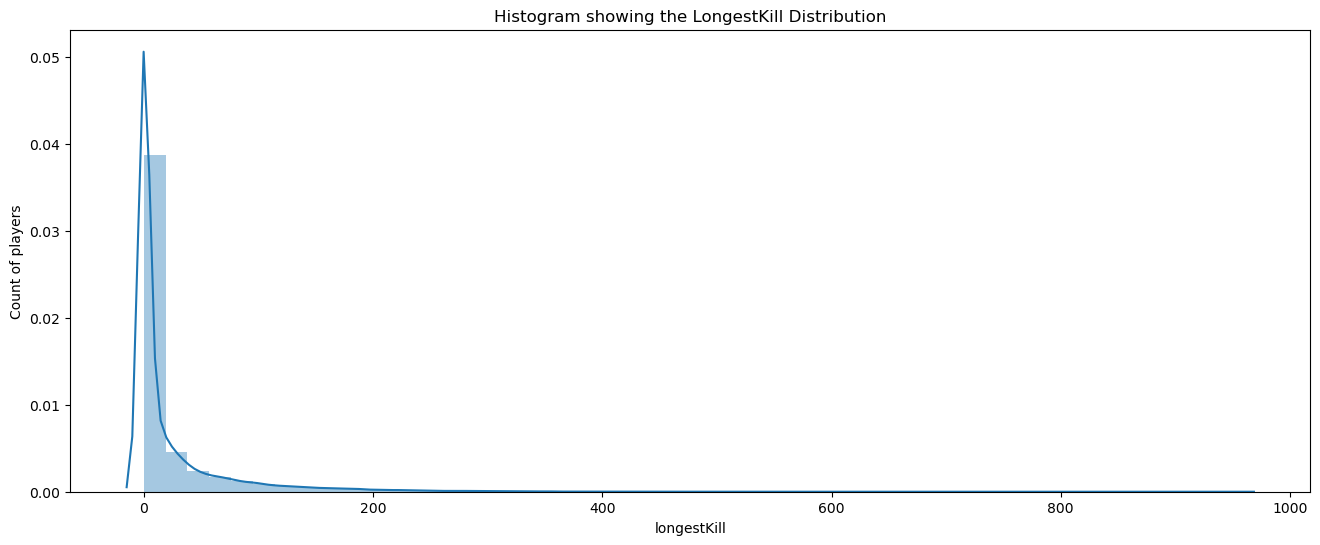

In [66]:
sns.distplot(df['longestKill'], bins = 50).set_title("Histogram showing the LongestKill Distribution")
plt.ylabel("Count of players")
plt.show()

In [67]:
df[df['longestKill']>=500].shape

(20, 33)

In [68]:
df.drop(df[df['longestKill']>=500].index, inplace = True)

#### Weapon Change

<center><img src = "https://j.gifs.com/3loOmn.gif"></center>

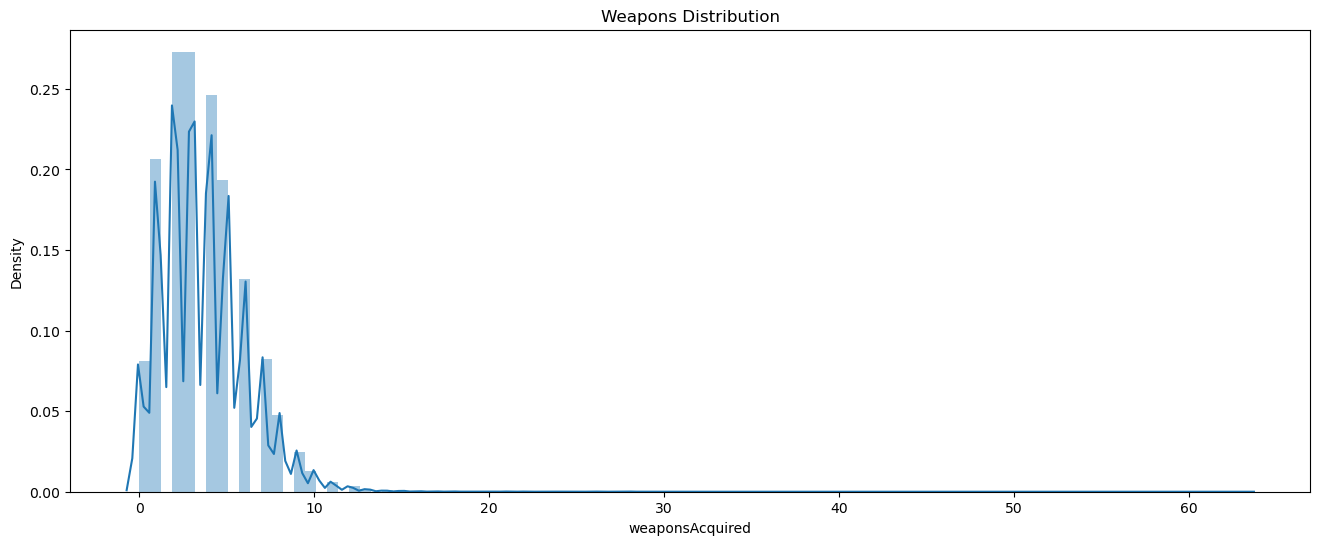

In [75]:
sns.distplot(df['weaponsAcquired'], bins=100).set_title("Weapons Distribution")
plt.show()

In [76]:
df[df['weaponsAcquired']>=15].shape

(162, 33)

In [77]:
df.drop(df[df['weaponsAcquired']>=15].index, inplace = True)

### EDA

In [90]:
df.shape

(101767, 33)

In [92]:
df.isna().sum()

Id                    0
groupId               0
matchId               0
assists               0
boosts                0
damageDealt           0
DBNOs                 0
headshotKills         0
heals                 0
killPlace             0
killPoints            0
kills                 0
killStreaks           0
longestKill           0
matchDuration         0
matchType             0
maxPlace              0
numGroups             0
rankPoints            0
revives               0
rideDistance          0
roadKills             0
swimDistance          0
teamKills             0
vehicleDestroys       0
walkDistance          0
weaponsAcquired       0
winPoints             0
winPlacePerc          0
playersJoined         0
totalDistance         0
killswithoutMoving    0
headshot_rate         0
dtype: int64

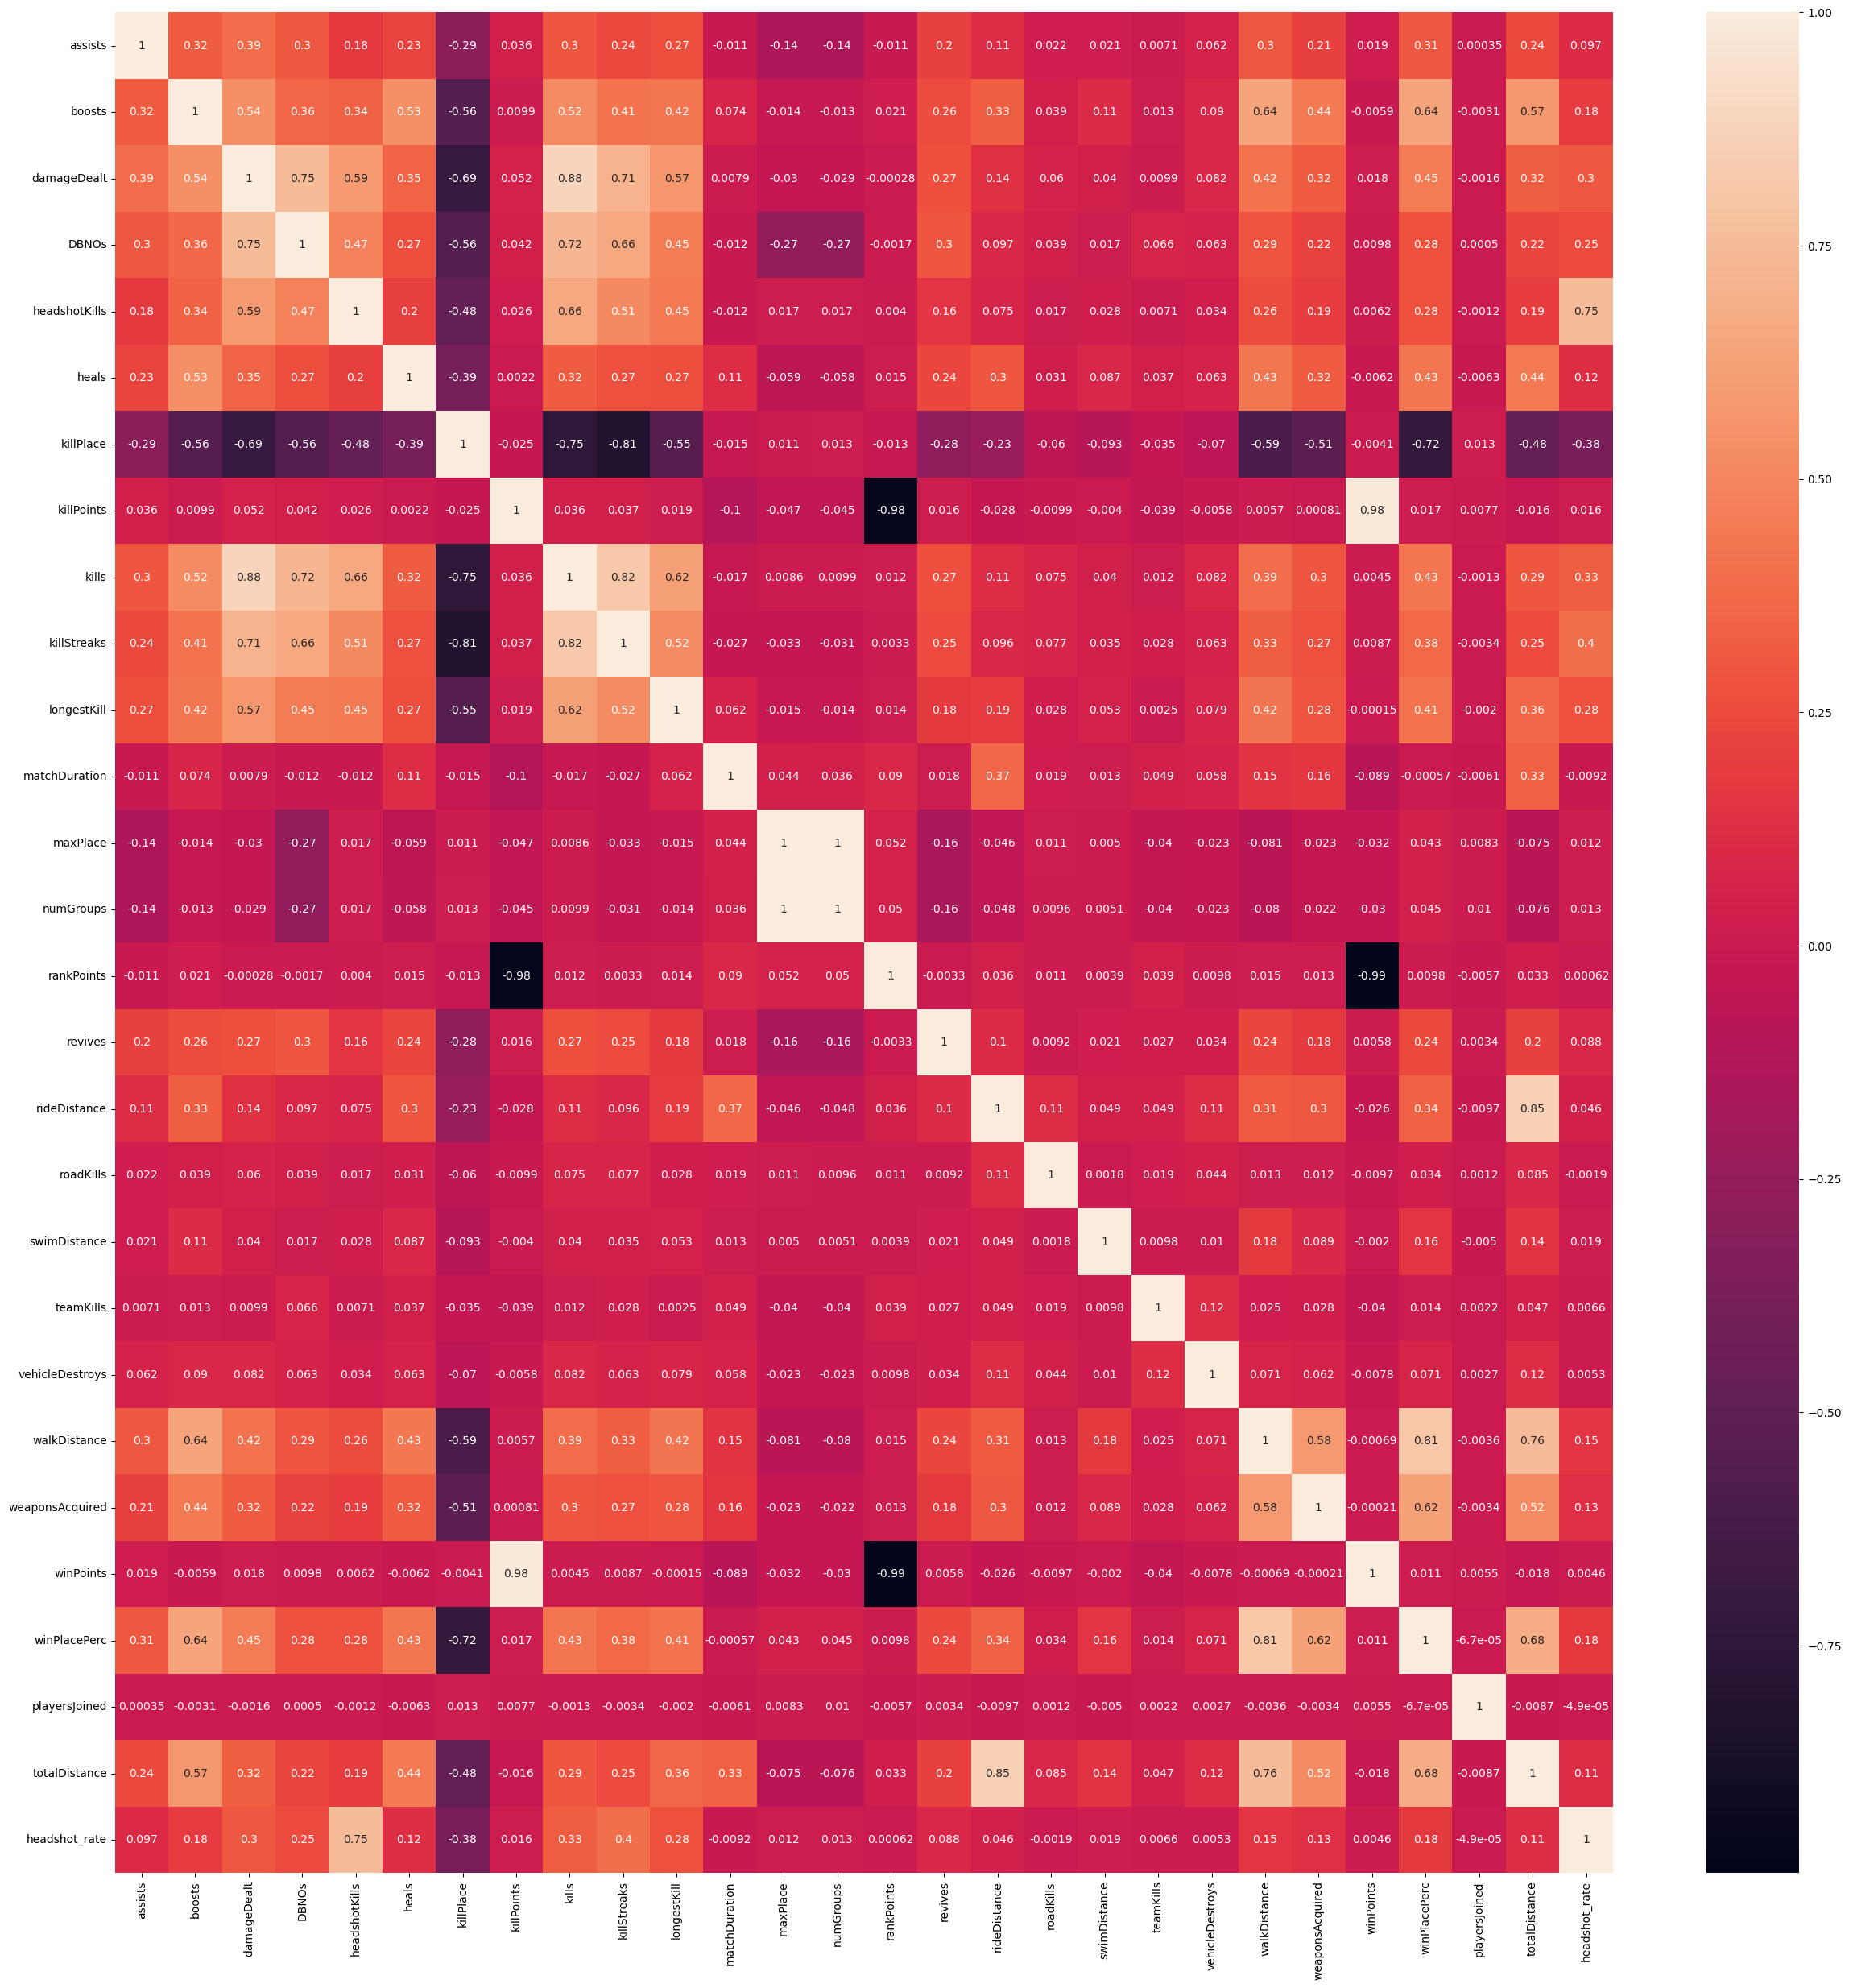

In [94]:
# correlation of parameter with Win Prediction
plt.figure(figsize=[30,30])
df_numeric = df.select_dtypes(include=['number'])
sns.heatmap(df_numeric.corr(), annot = True)

plt.show()

# <font color = "green">Feature Engineering</font><a class = "anchor" id = "feature"></a>

In [88]:
normalising_factor = (100 - df['playersJoined']/100)+1

In [108]:
df['killsNorm'] = df['kills'] * normalising_factor
df['damageDealtNorm'] = df['damageDealt'] * normalising_factor
df['maxPlaceNorm'] = df['maxPlace'] * normalising_factor
df['matchDurationNorm'] = df['matchDuration'] * normalising_factor


df['traveldistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
df['healsnboosts'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [110]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playersJoined',
       'totalDistance', 'killswithoutMoving', 'headshot_rate', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

In [112]:
data = df.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance', 
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration'])

In [114]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totalDistance,killswithoutMoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,0.00,0.0000,2826.88,131853.76,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,0.00,9233.8965,2624.70,179388.15,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,0.00,6865.9600,5048.50,133078.46,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,0.00,3320.9260,3129.14,144949.84,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,100.96,10096.0000,9793.12,143767.04,49.7500,0,0


# <font color = "green">ML - Catboost Model</font><a class = "anchor" id = "cat"></a>

#### Handling categorical data

In [118]:
x = data.drop(['winPlacePerc'], axis = 1)
y = data['winPlacePerc']

In [120]:
x = pd.get_dummies(x, columns = ['matchType', 'killswithoutMoving'])

In [122]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killswithoutMoving_False
0,0,0,60,1241,0,0.00,26,-1,0,0,...,False,False,False,False,False,False,False,False,True,True
1,0,0,57,0,0,0.00,25,1484,0,0,...,False,False,False,False,False,False,False,False,True,True
2,0,0,47,0,0,0.00,47,1491,0,0,...,False,False,False,False,False,False,False,False,False,True
3,0,0,75,0,0,0.00,30,1408,0,0,...,False,False,False,False,False,False,False,False,True,True
4,0,0,45,0,1,58.53,95,1560,0,0,...,False,False,False,False,False,False,True,False,False,True


In [124]:
x.shape

(101767, 40)

In [126]:
features = x.columns

#### Scaling the data

In [129]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x))

In [131]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.581822,-0.384533,0.449067,1.17353,-0.762408,-0.456906,-0.731603,-1.211240,-0.048197,-0.143012,...,-0.033193,-0.003135,-0.015359,-0.01086,-0.051673,-0.206446,-0.371675,-0.40526,1.231182,0.0
1,-0.581822,-0.384533,0.339844,-0.80534,-0.762408,-0.456906,-0.774501,0.803843,-0.048197,-0.143012,...,-0.033193,-0.003135,-0.015359,-0.01086,-0.051673,-0.206446,-0.371675,-0.40526,1.231182,0.0
2,-0.581822,-0.384533,-0.024232,-0.80534,-0.762408,-0.456906,0.169267,0.813341,-0.048197,-0.143012,...,-0.033193,-0.003135,-0.015359,-0.01086,-0.051673,-0.206446,-0.371675,-0.40526,-0.812228,0.0
3,-0.581822,-0.384533,0.995181,-0.80534,-0.762408,-0.456906,-0.560008,0.700714,-0.048197,-0.143012,...,-0.033193,-0.003135,-0.015359,-0.01086,-0.051673,-0.206446,-0.371675,-0.40526,1.231182,0.0
4,-0.581822,-0.384533,-0.097047,-0.80534,0.646157,0.739853,2.228397,0.906972,-0.048197,-0.143012,...,-0.033193,-0.003135,-0.015359,-0.01086,-0.051673,-0.206446,2.690522,-0.40526,-0.812228,0.0


#### Splitting data

In [134]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size = 0.3, random_state = 0)

In [136]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(71236, 40) (71236,)
(30531, 40) (30531,)


## CatBoost Model

In [139]:
import catboost as cb

In [141]:
train_dataset = cb.Pool(xtrain, ytrain)
test_dataset = cb.Pool(xtest, ytest)

In [167]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [169]:

# GRID Search

grid = {'iterations': [100, 150], 
       'learning_rate': [0.03, 0.1], 
       'depth': [2, 4, 6, 8]}

model.grid_search(grid, train_dataset)

0:	learn: 0.5500359	test: 0.5495438	best: 0.5495438 (0)	total: 9.48ms	remaining: 938ms
1:	learn: 0.5351168	test: 0.5346613	best: 0.5346613 (1)	total: 17ms	remaining: 833ms
2:	learn: 0.5209343	test: 0.5205073	best: 0.5205073 (2)	total: 23.2ms	remaining: 751ms
3:	learn: 0.5069686	test: 0.5066027	best: 0.5066027 (3)	total: 29.7ms	remaining: 712ms
4:	learn: 0.4934232	test: 0.4931072	best: 0.4931072 (4)	total: 37.2ms	remaining: 706ms
5:	learn: 0.4803082	test: 0.4800326	best: 0.4800326 (5)	total: 46.8ms	remaining: 733ms
6:	learn: 0.4676527	test: 0.4673947	best: 0.4673947 (6)	total: 54.3ms	remaining: 721ms
7:	learn: 0.4555558	test: 0.4552890	best: 0.4552890 (7)	total: 74.9ms	remaining: 861ms
8:	learn: 0.4436888	test: 0.4434466	best: 0.4434466 (8)	total: 95.8ms	remaining: 968ms
9:	learn: 0.4322114	test: 0.4319996	best: 0.4319996 (9)	total: 111ms	remaining: 1s
10:	learn: 0.4211598	test: 0.4209858	best: 0.4209858 (10)	total: 132ms	remaining: 1.06s
11:	learn: 0.4104565	test: 0.4103050	best: 0.410

{'params': {'depth': 8, 'learning_rate': 0.1, 'iterations': 150},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [165]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = features
feature_importance_df['importance'] = model.feature_importances_

feature_importance_df = feature_importance_df.sort_values(by = ['importance'], ascending=False)

In [147]:
feature_importance_df

,features,importance
2,killPlace,42.105378
20,traveldistance,13.403964
14,totalDistance,10.014602
16,killsNorm,7.530500
4,killStreaks,6.963436
19,matchDurationNorm,5.879052
6,numGroups,3.617896
21,healsnboosts,2.214895
18,maxPlaceNorm,1.858347
11,weaponsAcquired,1.194551


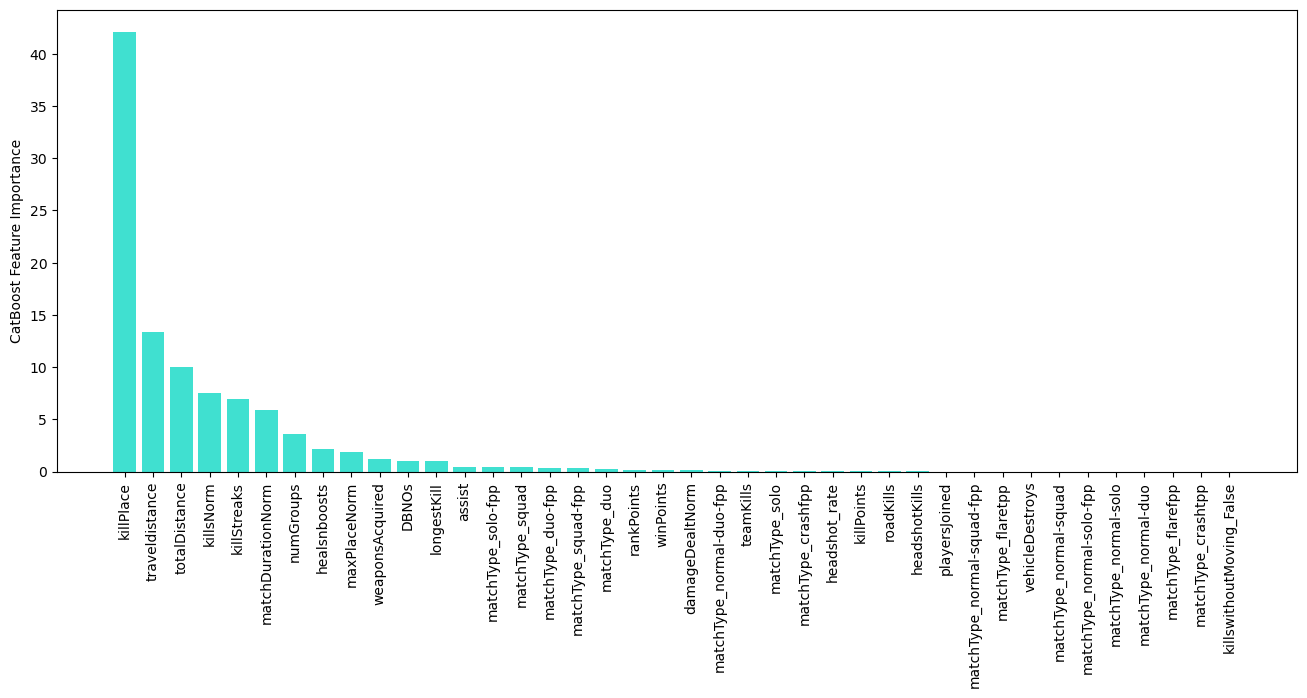

In [148]:
plt.bar(feature_importance_df.features, feature_importance_df.importance, color='turquoise')
plt.ylabel("CatBoost Feature Importance")
plt.xticks(rotation = 90)
plt.show()

#### Prediction

In [149]:
pred = model.predict(xtest)

In [150]:
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)

print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 0.09
R2: 0.92


<center> <img src ="https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExbjRsNnRnbndhNjFuaDVsOW5xNXA3ZmFiZHBlYzdsZWRubHZwNWlqYSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/xRsXYuylC8m5YQwycJ/giphy.gif"></center>